# Problem

Salah satu masalah utama pertanian adalah gagal panen,dimana penyebab utamnaya adalah hama yang menyebabkan penyakit tanaman,dan para petani
tidak bisah menaggulangi dan mendiangnosis penyakit tanaman di awal atau early inditification,maka dari itu para petani gagal dalam menangani masalah
tersebut

# Solusi

salah satu cara menangani gagal panen adalah mengetahui masalah dan jenis penyakit tanaman tersebut dengan cepat supaya dapat di tanganani dengan tepat
maka dibutuhkan sebuah early inditification dengan menggunakan machine learning atau deep learning yang di integarasikan dengan system mobile aplikasi

# Dataset

* Api = [Dataset_plants_diases](https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset)
* Api key = kaggle datasets download -d vipoooool/new-plant-diseases-dataset

## Pipeline Build

1. Pemrosesan Data
2. Membangun Model
3. Pelatihan Model
4. Evaluasi Model
5. Prediksi Model

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import tensorboard
from keras.callbacks import Callback, TensorBoard
import time
import numpy as np
import matplotlib.pyplot as plt

## 1. Pemrosesan Data
Mempersiapkan data yang akan di gunakan untuk melatih model:
* data ✅
* Melakukan augmentasi(opsional)✅
* split data✅
* menormalkan data✅
* visualisasi data✅
* jumlah data setiap kelas ✅

In [22]:
#data
data = "dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data + "/train"
valid_dir = data + "/valid"

In [23]:
train_dir

'dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [24]:
#split data
train_datagen = ImageDataGenerator(
    rescale = 1./255
)
valid_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)
# data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True,
    seed = 64,
    class_mode = "categorical"
)

test_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    # seed = 64,
    class_mode = "categorical",
    subset = "training"
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True,
    # seed = 64,
    class_mode = "categorical",
    subset = "validation"
)

Found 70295 images belonging to 38 classes.
Found 14069 images belonging to 38 classes.
Found 3503 images belonging to 38 classes.


In [8]:
# jumlah data
classes = os.listdir(train_dir)
print(classes), print(f"jumlah class: {len(classes)}")

['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Target_Spot', 'Peach___healthy', 'Potato___Late_blight', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Cedar_apple_rust', 'Tomato___Bacterial_spot', 'Grape___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Squash___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___B

(None, None)

In [9]:
# jumlah tanaman dan penyakit
plants = []
diseases = 0

for plant in classes:
    if plant.split("___")[0] not in plants:
        plants.append(plant.split("___")[0])
    if plant.split("___")[1] != 'healthy':
        diseases += 1

print(f"nama pohon: {plants}")
print("jumlah plant:", len(plants))
print("jumlah disease:", diseases )

nama pohon: ['Strawberry', 'Grape', 'Potato', 'Blueberry', 'Corn_(maize)', 'Tomato', 'Peach', 'Pepper,_bell', 'Orange', 'Cherry_(including_sour)', 'Apple', 'Raspberry', 'Squash', 'Soybean']
jumlah plant: 14
jumlah disease: 26


In [10]:
#hitung jumlah data
class_count = train_generator.classes
unique, count = np.unique(class_count, return_counts=True)
# mapping
class_count_dict = dict(zip(train_generator.class_indices, count))
class_count_dict

{'Apple___Apple_scab': 2016,
 'Apple___Black_rot': 1987,
 'Apple___Cedar_apple_rust': 1760,
 'Apple___healthy': 2008,
 'Blueberry___healthy': 1816,
 'Cherry_(including_sour)___Powdery_mildew': 1683,
 'Cherry_(including_sour)___healthy': 1826,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 1642,
 'Corn_(maize)___Common_rust_': 1907,
 'Corn_(maize)___Northern_Leaf_Blight': 1908,
 'Corn_(maize)___healthy': 1859,
 'Grape___Black_rot': 1888,
 'Grape___Esca_(Black_Measles)': 1920,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1722,
 'Grape___healthy': 1692,
 'Orange___Haunglongbing_(Citrus_greening)': 2010,
 'Peach___Bacterial_spot': 1838,
 'Peach___healthy': 1728,
 'Pepper,_bell___Bacterial_spot': 1913,
 'Pepper,_bell___healthy': 1988,
 'Potato___Early_blight': 1939,
 'Potato___Late_blight': 1939,
 'Potato___healthy': 1824,
 'Raspberry___healthy': 1781,
 'Soybean___healthy': 2022,
 'Squash___Powdery_mildew': 1736,
 'Strawberry___Leaf_scorch': 1774,
 'Strawberry___healthy': 1824,
 '

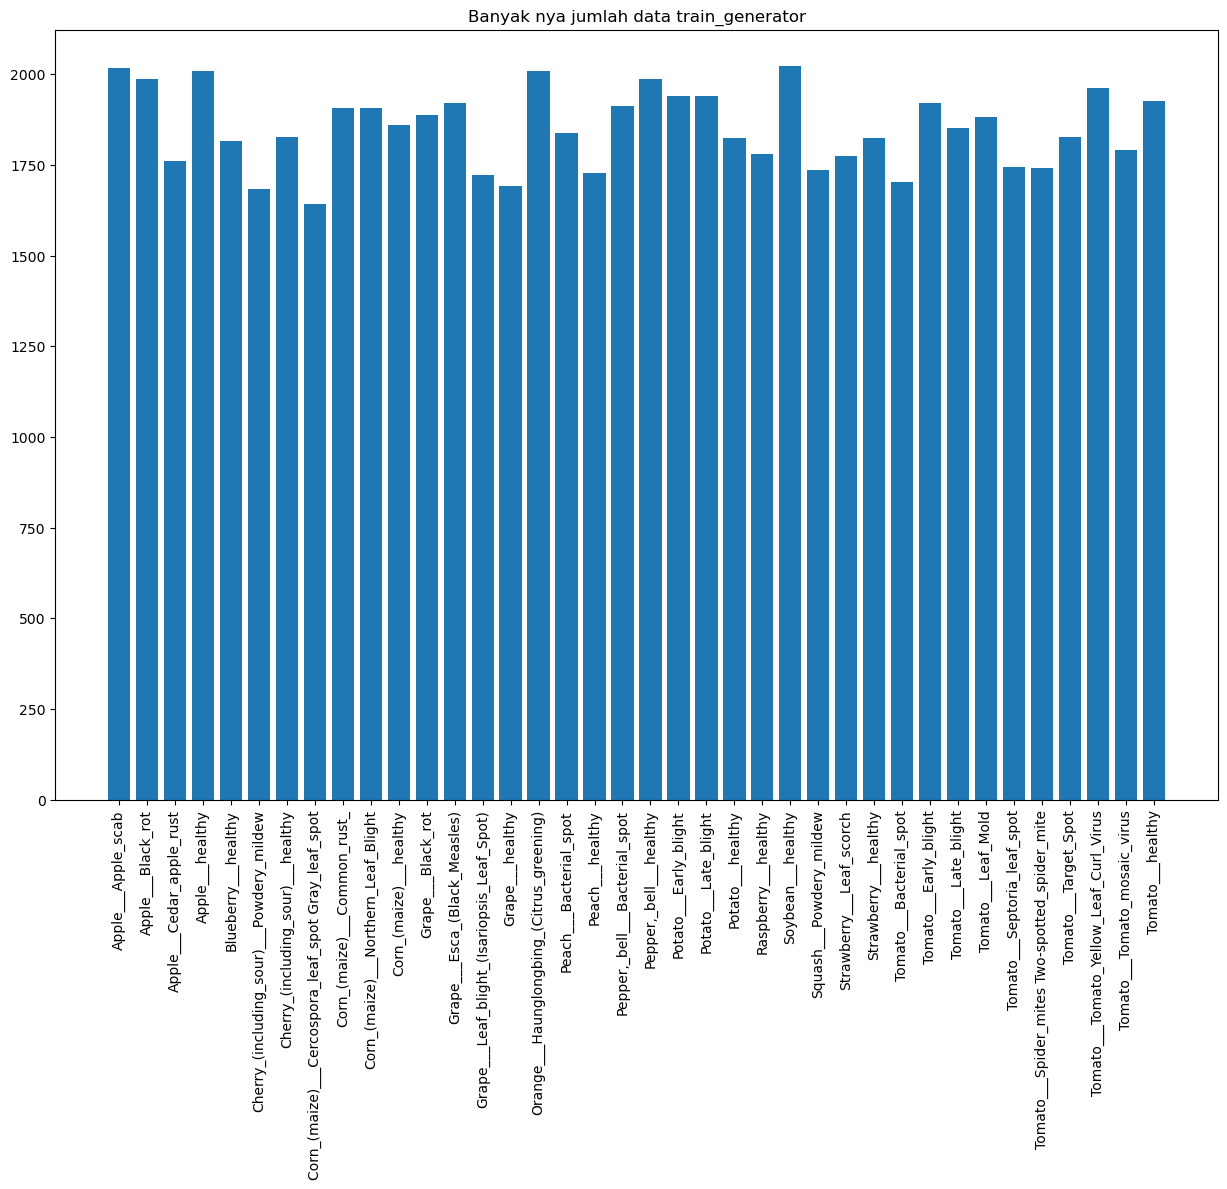

In [11]:
plt.figure(figsize=(15, 10))
plt.bar(class_count_dict.keys(), class_count_dict.values())
plt.xticks(rotation=90)
plt.title("Banyak nya jumlah data train_generator")
plt.show()

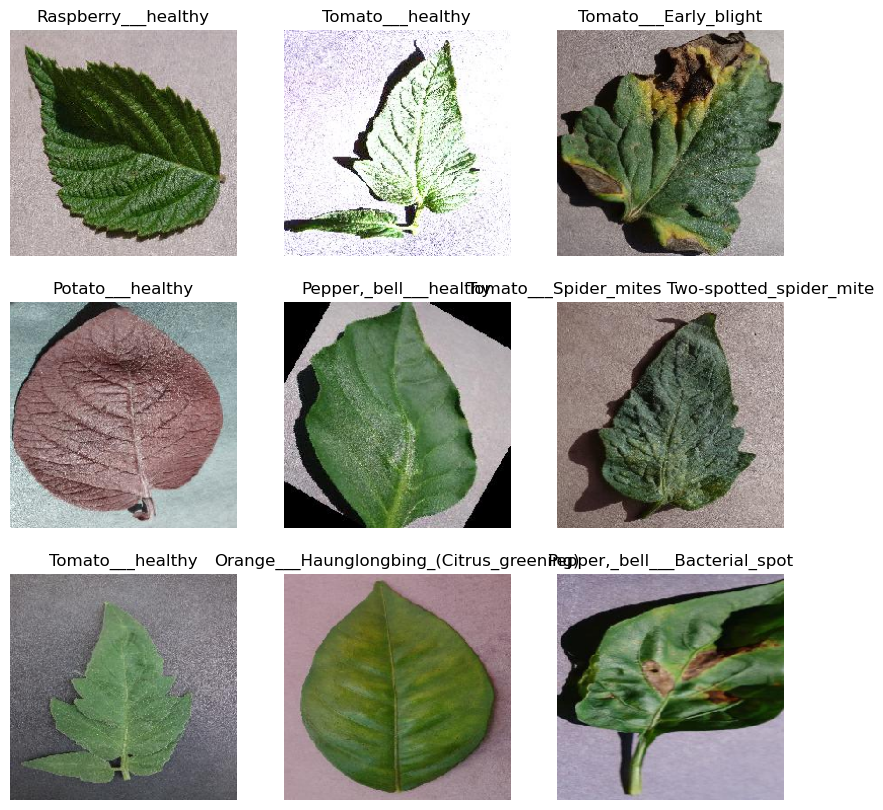

In [52]:
import matplotlib.pyplot as plt

# mendapatkan mapping dari kelas ke nama kelas
class_map = train_generator.class_indices
# membalikan mapping
inv_class_map = {v: k for k, v in class_map.items()}

#visualisai gambar
img, label = next(train_generator)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(img[i])
    labels = inv_class_map[label[i].argmax()]
    ax.set_title(labels)
    ax.axis("off")
plt.show()

In [13]:
img.shape

(32, 224, 224, 3)

## 2. Membangun Model 
Membangun model deep learning:
* Memilih arsitektur model ✅
* menentukan jumlah layer✅
* menentukan jumlah neuron✅
* menetukan fungsi aktivasi layer✅
* mengatur parameter model(optimizer, learning rate,dll)✅
* memilih akurasi✅

In [14]:
#arsitektur
mobileNet = "https://tfhub.dev/google/imagenet/mobilenet_v2_050_224/classification/5"

In [15]:
# model 
model = Sequential([
    #layer input
    hub.KerasLayer(mobileNet, input_shape=(224, 224, 3), trainable=False),
    #layer output
    Dense(len(classes), activation="softmax")]
)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-02-15 09:42:19.377336: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-15 09:42:19.377707: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1988505   
                                                                 
 dense (Dense)               (None, 38)                38076     
                                                                 
Total params: 2,026,581
Trainable params: 38,076
Non-trainable params: 1,988,505
_________________________________________________________________


## 3. Pelatihan Model
model di latih dengan model yang telah di buat
* Membut callback✅
* Menentukan jumlah epoch✅
* mencegah overfitting✅
* membuat tensorboard✅
* save model✅

In [17]:
%load_ext tensorboard

In [18]:
#membuat tensorboard callback
import datetime
def tensorboard_callback(name):
    logdir = os.path.join("Tensorboard/logs",
                          datetime.datetime.now().strftime("%Y%m%d"),f"{name}")
    return TensorBoard(logdir)

In [19]:
#custom callback dimana saat val_accuracy > 90 atau 10 menit pelatihan akan berhenti
class myCallback(Callback):
    def __init__(self, timeout_minute=10, target_accuracy=0.9):
        self.timeout = timeout_minute * 60
        self.accuracy = target_accuracy
    
    def on_train_begin(self, logs={}):
        self.start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        if logs.get("val_accuracy") is not None and logs.get("val_accuracy") >=  self.accuracy  :
            print(f"\nakurasi telah mencapai {self.accuracy*100}%")
            self.model.stop_training = True
            return
        
        elapsed_time = time.time() - self.start_time
        if elapsed_time > self.timeout:
            print(f"\nWaktu telah mencapai {self.timeout/60} menit")
            self.model.stop_training = True

In [20]:
customCallback = myCallback(target_accuracy=0.96)
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=valid_generator,
                    callbacks=[customCallback, tensorboard_callback("2")])

Epoch 1/100


2023-02-15 09:43:09.639292: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-15 09:43:11.937856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   6/2197 [..............................] - ETA: 3:36 - loss: 4.6978 - accuracy: 0.0417WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0967s vs `on_train_batch_end` time: 0.3242s). Check your callbacks.


2197/2197 [==============================] - ETA: 0s - loss: 0.3302 - accuracy: 0.8987

2023-02-15 09:45:57.159651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2197/2197 [==============================] - 176s 77ms/step - loss: 0.3302 - accuracy: 0.8987 - val_loss: 0.2149 - val_accuracy: 0.9355
Epoch 2/100
2197/2197 [==============================] - 165s 75ms/step - loss: 0.1682 - accuracy: 0.9454 - val_loss: 0.1984 - val_accuracy: 0.9366
Epoch 3/100
2197/2197 [==============================] - 214s 97ms/step - loss: 0.1430 - accuracy: 0.9528 - val_loss: 0.1936 - val_accuracy: 0.9398
Epoch 4/100
2197/2197 [==============================] - ETA: 0s - loss: 0.1262 - accuracy: 0.9580
Waktu telah mencapai 10.0 menit
2197/2197 [==============================] - 165s 75ms/step - loss: 0.1262 - accuracy: 0.9580 - val_loss: 0.1759 - val_accuracy: 0.9449


In [22]:
model.save("model_save1")

INFO:tensorflow:Assets written to: model_save1/assets


INFO:tensorflow:Assets written to: model_save1/assets


## 4. Evaluasi Model
Model di nilai sebarapa baik performa model dalam data uji
* Menggunakan matrik evaluasi ✅
* Membandingkan performa model pada data uji dan data validasi✅
* Menganalisis hasil evaluasi dan mengevaluasi kembali model✅

In [23]:
%tensorboard --logdir TensorBoard/logs

Reusing TensorBoard on port 6007 (pid 83315), started 1:30:45 ago. (Use '!kill 83315' to kill it.)

2023-02-15 12:29:14.678042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step


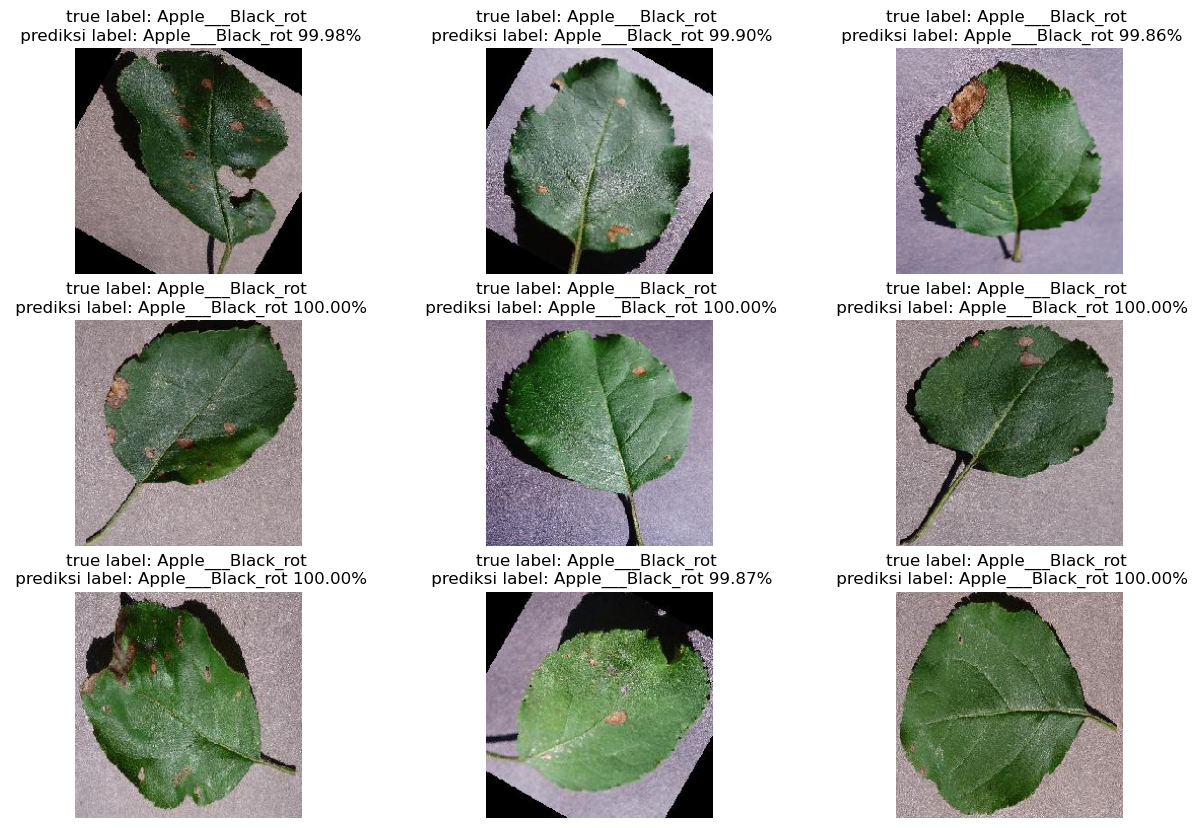

In [67]:
#mapping class
map = test_generator.class_indices
# invert mapping class
inv_class_indices = {k:v for v,k in map.items()}

# img dan true label dari test_generator
img, true_label = next(test_generator)
random_indices = np.random.choice(img.shape[0], 9, replace=False)
images = img[random_indices]
true_labels =true_label[random_indices]

# prediction
prediction = model.predict(images)

#visualisasi gambar
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i])
    labels = inv_class_indices[true_labels.argmax()]
    prediction_class = np.argmax(prediction[i])
    prediction_label =inv_class_indices[prediction_class]
    probability_label = prediction[i][prediction_class] * 100
    ax.set_title(f"true label: {labels} \n prediksi label: {prediction_label} {probability_label:.2f}%")
    ax.axis("off")

## 5. Prediksi dengan model
setelah dinyatakan model memiliki performa yang baik,maka di lanjutkan dengan data uji baru
* Menggunakan model yang di latih
* Memproses data uji baru dengan data yang digunakan pada melatih model
* save model

In [20]:
from tensorflow import keras
model = keras.models.load_model('model_save1')

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-02-15 13:11:32.857250: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-15 13:11:32.858860: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [72]:
class_count_dict.keys()

dict_keys(['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato__

In [69]:
# from tensorflow.keras.preprocessing import image

# def prediksi(path):
#     #kelas
#     map = train_generator.class_indices
#     classe = {k: v for v,k in map.items()}
#     #image
#     img_ = image.load_img(path, target_size=(224, 224))
#     img = image.img_to_array(img_)
#     img = np.expand_dims(img, axis=0)
#     prediction = model.predict(img)

#     fig, ax = plt.subplots(figsize=(5, 5))
#     ax.imshow(img_)
#     ax.axis("off")
#     label = classe[prediction.argmax()]
#     probabilitas = np.max(prediction) *100
#     ax.set_title(f"{label}\nprobabilitas:{probabilitas:.2f}%")
    
    